<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [20]:
data_full = pd.read_csv('data/preco_casa.csv')

## Visualizar os dados

In [21]:
data_full.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


## Verificando o tamanho do dataset

In [22]:
data_full.shape

(500000, 16)

# Simplificando as colunas

In [23]:
data = data_full[['Prices', 'Area', 'Garage', 'Baths', 'FirePlace', 'White Marble', 'Floors']]

# Visualizar os dados simplificados

In [24]:
data.head()

,Prices,Area,Garage,Baths,FirePlace,White Marble,Floors
0,43800,164,2,2,0,0,0
1,37550,84,2,4,0,0,1
2,49500,190,2,4,4,1,0
3,50075,75,2,4,4,0,1
4,52400,148,1,2,4,1,1


# Verificar o tamanho dos dados simplificados

In [25]:
data.shape

(500000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [26]:
data.describe().round(2)

,Prices,Area,Garage,Baths,FirePlace,White Marble,Floors
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.0
mean,42050.14,124.93,2.00,3.00,2.00,0.33,0.5
std,12110.24,71.80,0.82,1.41,1.41,0.47,0.5
min,7725.00,1.00,1.00,1.00,0.00,0.00,0.0
25%,33500.00,63.00,1.00,2.00,1.00,0.00,0.0
50%,41850.00,125.00,2.00,3.00,2.00,0.00,0.0
75%,50750.00,187.00,3.00,4.00,3.00,1.00,1.0
max,77975.00,249.00,3.00,5.00,4.00,1.00,1.0


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [27]:
data.corr().round(4)

,Prices,Area,Garage,Baths,FirePlace,White Marble,Floors
Prices,1.0000,0.1477,0.1003,0.1451,0.0891,0.4482,0.6195
Area,0.1477,1.0000,-0.0009,-0.0004,0.0004,0.0025,-0.0008
Garage,0.1003,-0.0009,1.0000,-0.0036,0.0013,0.0005,-0.0009
Baths,0.1451,-0.0004,-0.0036,1.0000,0.0006,0.0025,-0.0009
FirePlace,0.0891,0.0004,0.0013,0.0006,1.0000,0.0010,0.0002
White Marble,0.4482,0.0025,0.0005,0.0025,0.0010,1.0000,0.0001
Floors,0.6195,-0.0008,-0.0009,-0.0009,0.0002,0.0001,1.0000


* A presença de mármore e o número de andares impacta muito no preço

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [28]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

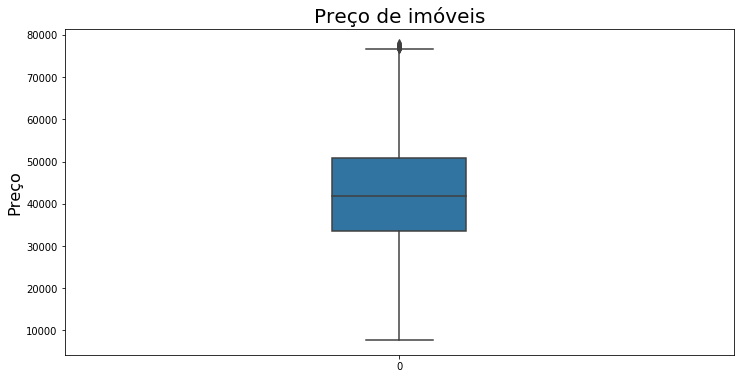

In [29]:
ax = sns.boxplot(data = data['Prices'], orient='v', width = 0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço de imóveis', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

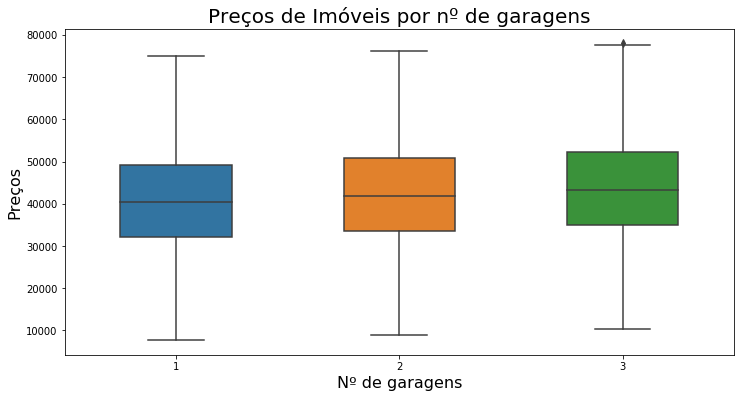

In [30]:
ax = sns.boxplot(y = 'Prices', x = 'Garage', data = data, orient='v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços de Imóveis por nº de garagens', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax.set_xlabel('Nº de garagens', fontsize=16)
ax

### Box-plot (Preço X Banheiros)

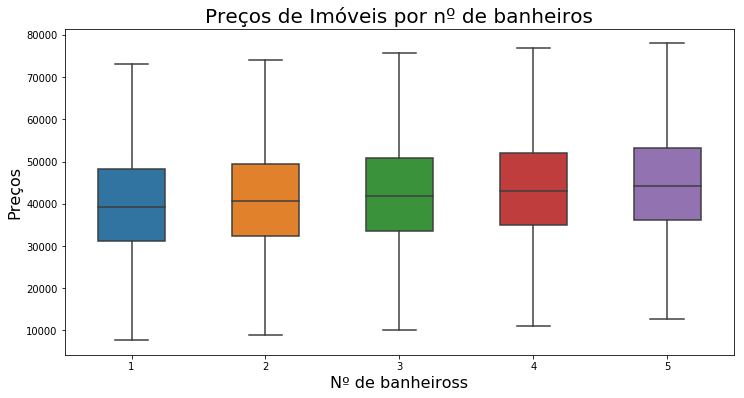

In [31]:
ax = sns.boxplot(y = 'Prices', x = 'Baths', data = data, orient='v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços de Imóveis por nº de banheiros', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax.set_xlabel('Nº de banheiross', fontsize=16)
ax

### Box-plot (Preço X Lareira)

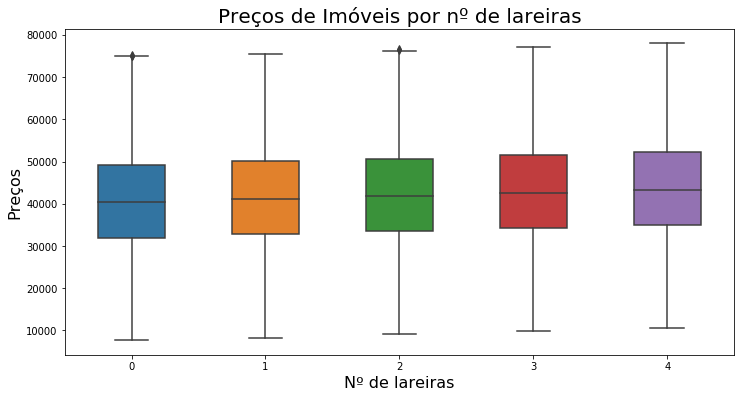

In [32]:
ax = sns.boxplot(y = 'Prices', x = 'FirePlace', data = data, orient='v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços de Imóveis por nº de lareiras', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax.set_xlabel('Nº de lareiras', fontsize=16)
ax

### Box-plot (Preço X Acabamento em Mármore)

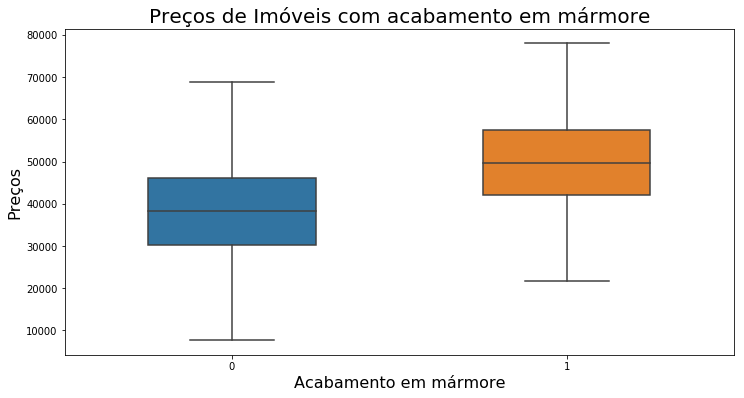

In [33]:
ax = sns.boxplot(y = 'Prices', x = 'White Marble', data = data, orient='v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços de Imóveis com acabamento em mármore', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax.set_xlabel('Acabamento em mármore', fontsize=16)
ax

### Box-plot (Preço X Andares)

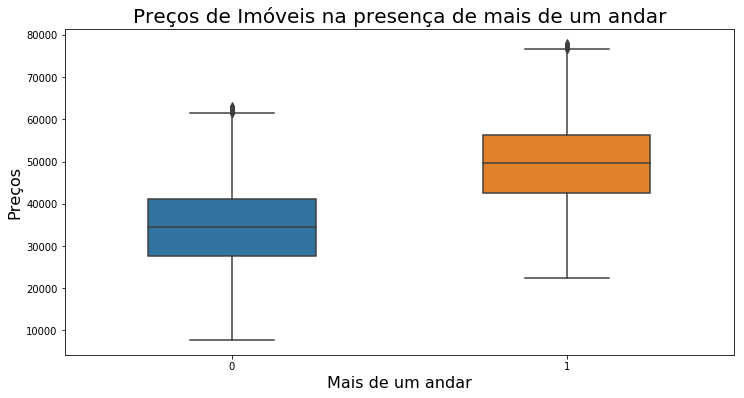

In [34]:
ax = sns.boxplot(y = 'Prices', x = 'Floors', data = data, orient='v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços de Imóveis na presença de mais de um andar', fontsize=20)
ax.set_ylabel('Preços', fontsize=16)
ax.set_xlabel('Mais de um andar', fontsize=16)
ax

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

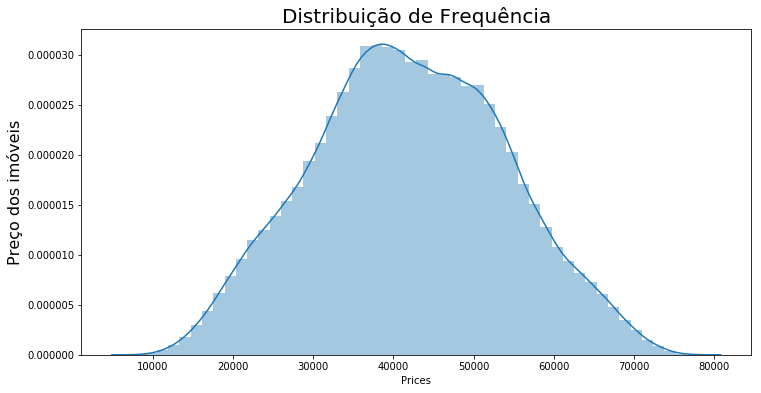

In [35]:
ax = sns.distplot(data['Prices'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência', fontsize=20)
ax.set_ylabel('Preço dos imóveis', fontsize=16)
ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

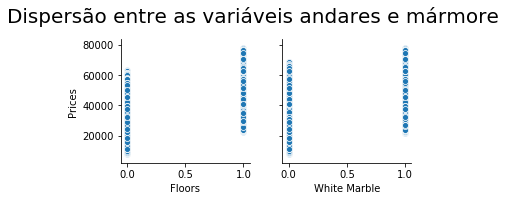

In [36]:
ax = sns.pairplot(data, y_vars = 'Prices', x_vars = ['Floors', 'White Marble'])
ax.fig.suptitle('Dispersão entre as variáveis andares e mármore', fontsize = 20, y = 1.1)
ax

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [37]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [39]:
y = data['Prices']
y.head()

0    43800
1    37550
2    49500
3    50075
4    52400
Name: Prices, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [43]:
X = data[['Floors', 'White Marble']]
X.head()

,Floors,White Marble
0,0,0
1,1,0
2,0,1
3,1,0
4,1,1


## Criando os datasets de treino e de teste

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [46]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [49]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [51]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.58


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [53]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [54]:
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

R² = 0.58


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [66]:
Floor = 1
White_Marble = 1
entrada = [[Floor, White_Marble]]
entrada
print('Price: {:.2f}'.format(modelo.predict(entrada)[0]))

Price: 57239.23


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo

In [67]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns = ['Métricas'])

,Métricas
EQM,61194553.23
REQM,7822.69
R²,0.58


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [68]:
import pickle

## Salvando o modelo estimado

In [69]:
output = open('modelo_preco_imovel', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```